In [5]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
df = pd.read_csv(path + "/StudentPerformanceFactors.csv")
df_mod = df.copy()

In [6]:
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical summary:\n", df.describe())


First 5 rows:
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0

In [9]:
for col in df_mod.columns:
    if df_mod[col].dtype != 'O':
        df_mod[col].fillna(df_mod[col].median())
    else:
        df_mod[col].fillna(df_mod[col].mode()[0])

In [10]:
numerical_cols = [col for col in df_mod.columns if df_mod[col].dtype != 'O']
categorical_cols = [col for col in df_mod.columns if df_mod[col].dtype == 'O']

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [11]:
z_scores = np.abs(stats.zscore(df_mod[numerical_cols]))
df_mod = df_mod[(z_scores < 3).all(axis=1)]

In [12]:
df_mod['Study_Efficiency'] = df_mod['Hours_Studied'] / df_mod['Sleep_Hours']

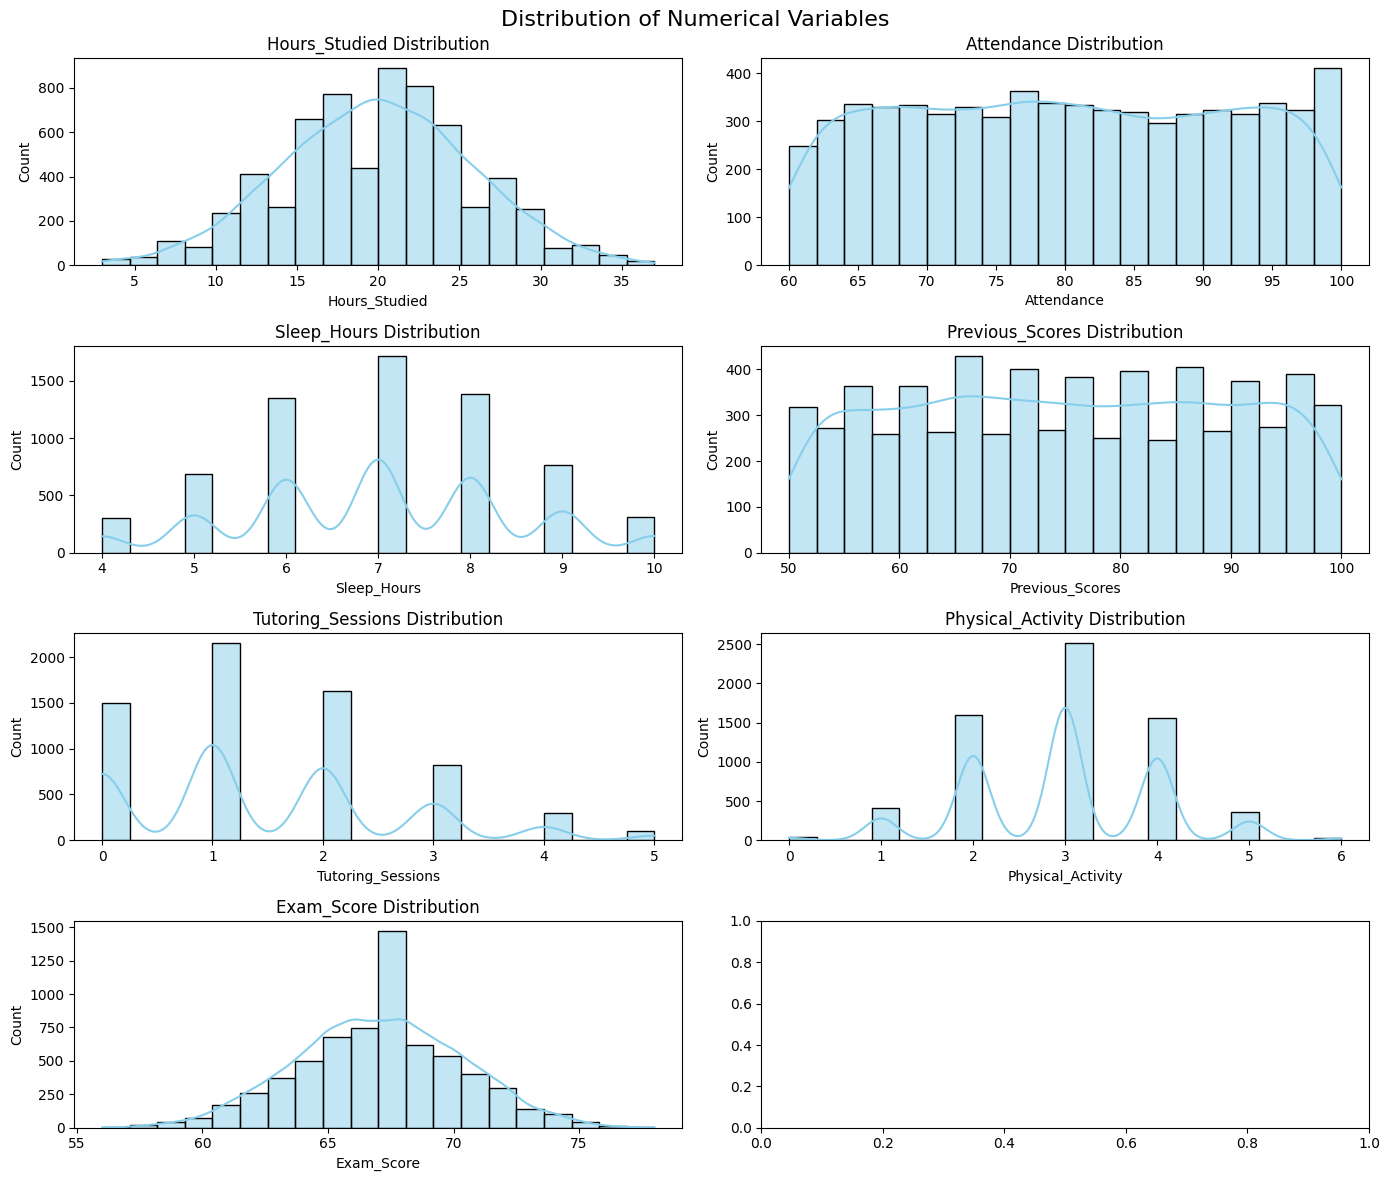

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,12))
plt.suptitle("Distribution of Numerical Variables", fontsize=16)

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.histplot(df_mod[col], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

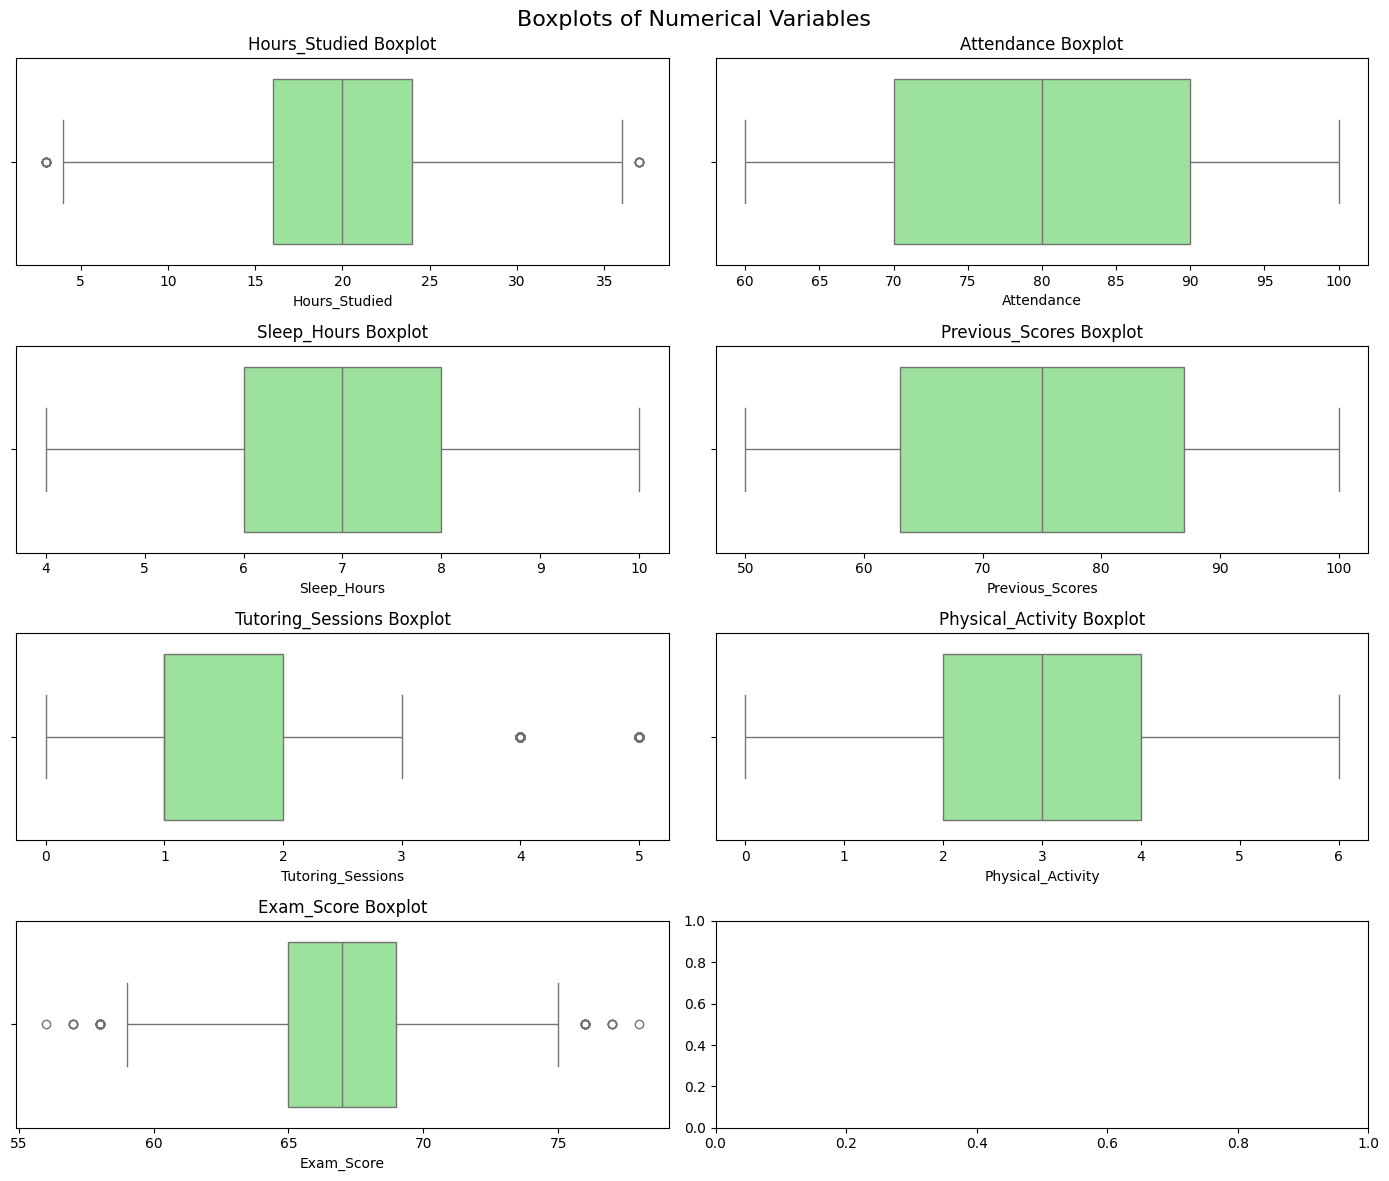

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,12))
plt.suptitle("Boxplots of Numerical Variables", fontsize=16)

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.boxplot(x=df_mod[col], ax=ax, color='lightgreen')
    ax.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

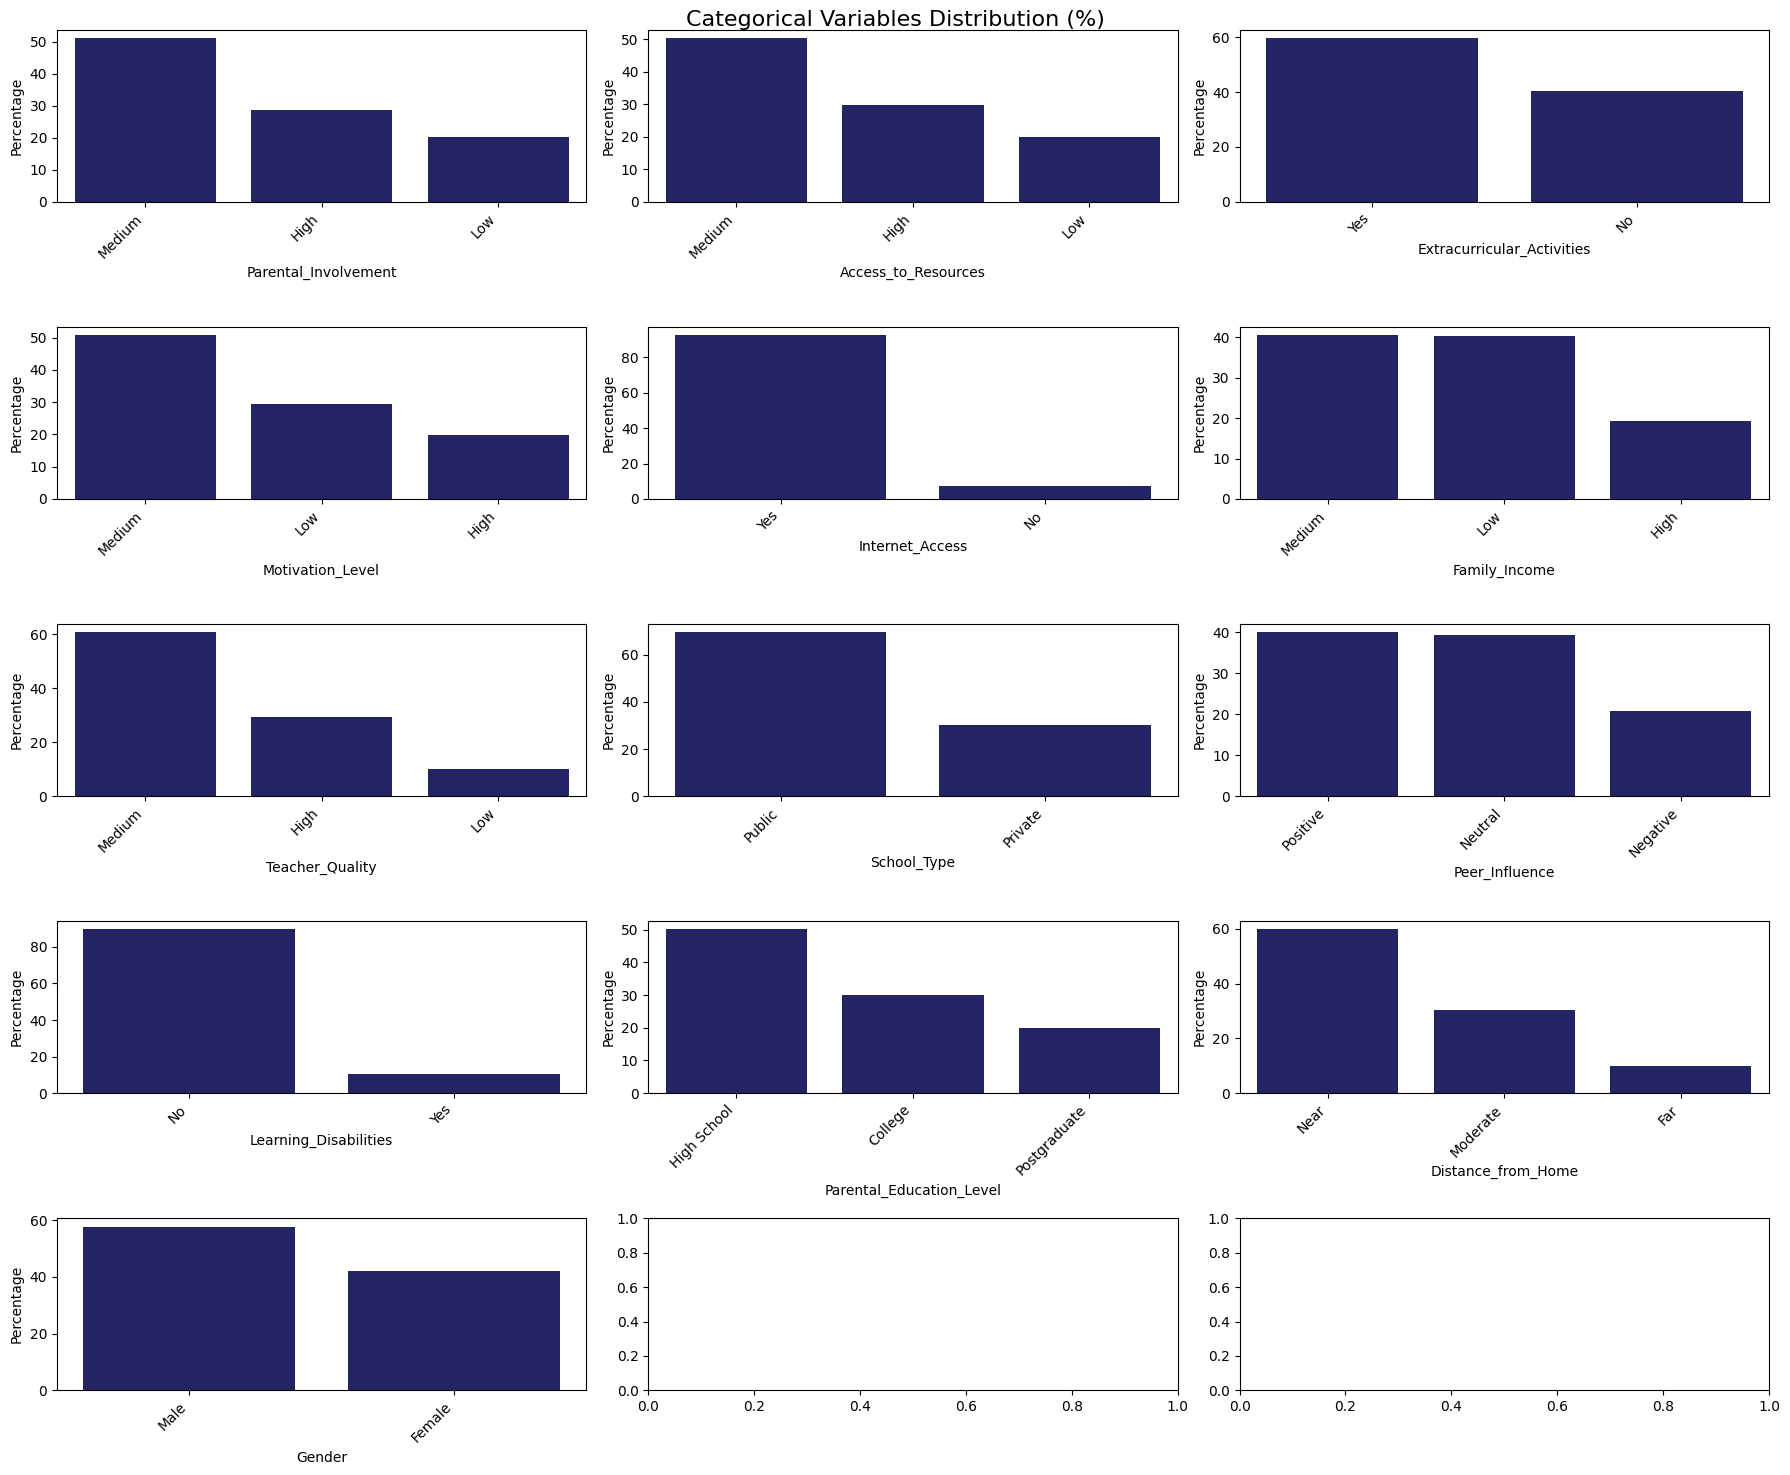

In [20]:
num_rows = df_mod.shape[0]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 15))
plt.suptitle("Categorical Variables Distribution (%)", fontsize=16)

for col, ax in zip(categorical_cols, axes.flatten()):
    counts = df_mod[col].value_counts(normalize=True) * 100
    
    sns.barplot(x=counts.index, y=counts.values, ax=ax, color='midnightblue')
    
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


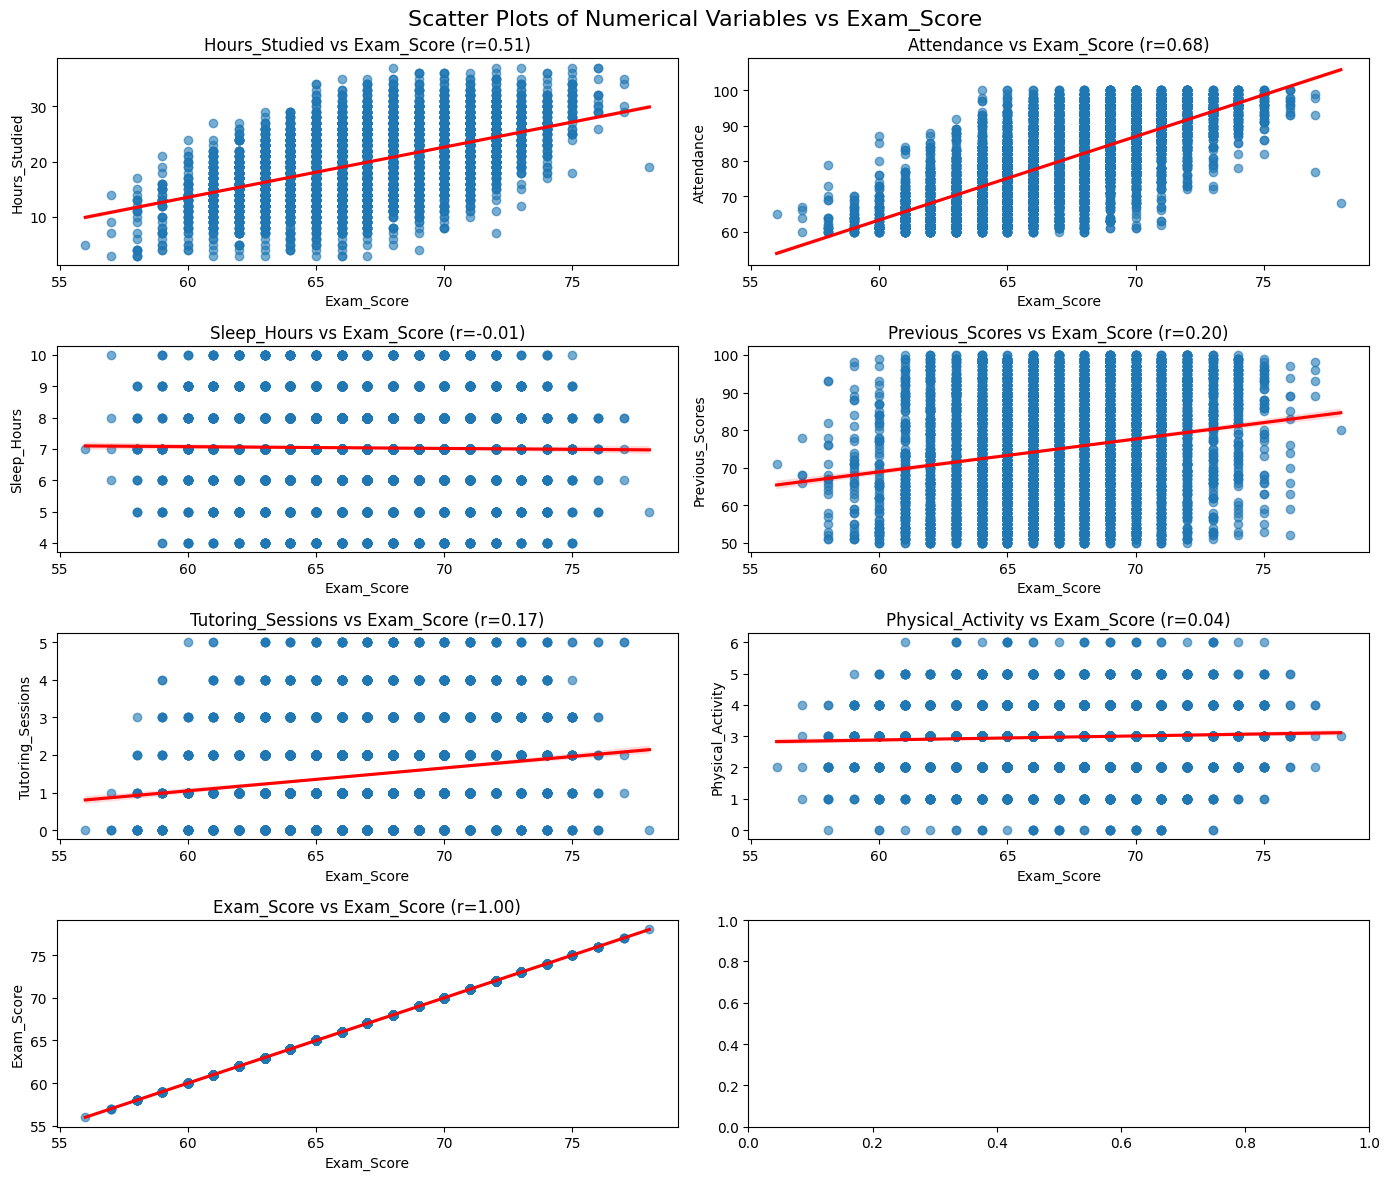

In [21]:
target = 'Exam_Score'

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,12))
plt.suptitle(f"Scatter Plots of Numerical Variables vs {target}", fontsize=16)

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.regplot(x=df_mod[target], y=df_mod[col], ax=ax, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    r = df_mod[target].corr(df_mod[col])
    ax.set_title(f'{col} vs {target} (r={r:.2f})')

plt.tight_layout()
plt.show()

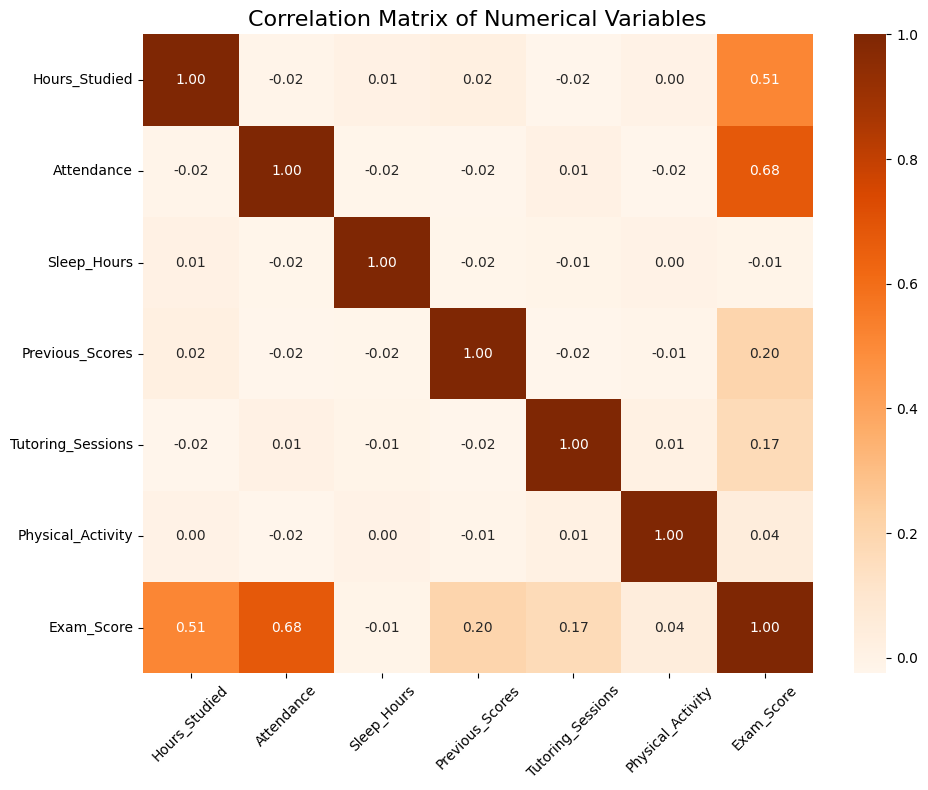

In [22]:
corr_matrix = df_mod[numerical_cols].corr()
plt.figure(figsize=(10,8))
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Oranges', cbar=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
corr_with_target = corr_matrix[target].sort_values(ascending=False)
print("\nCorrelation with Exam_Score:\n", corr_with_target)


Correlation with Exam_Score:
 Exam_Score           1.000000
Attendance           0.679236
Hours_Studied        0.511748
Previous_Scores      0.201126
Tutoring_Sessions    0.168669
Physical_Activity    0.041617
Sleep_Hours         -0.012904
Name: Exam_Score, dtype: float64
